## Aufgabe 2: Genexpression

Wir möchten die Expressionsdaten 1 von Krebspatienten (K) und gesunden Patienten (G)
analysieren. Machen Sie sich zuerst mit den Daten vertraut:

a) Laden Sie die Tabelle und schauen Sie sich die deskriptiven Statistiken der Expressions-
werte in den verschiedenen Experimenten an (z.B. summary, str, mean, ...). Erstellen
Sie eine Grafik, die die Verteilung der Experessionswerte in den 10 unterschiedlichen
Experimenten zeigt (z.B. boxplot, hist oder Funktionen in ggplot2 ). Was fällt Ihnen
auf? Welche Transformation der Daten würden Sie vorschlagen?

In [11]:
import pandas as pd

data = pd.read_csv("expr_cel.txt", sep="\t")

data.head()

,gene,K_18,K_19,G_20,K_21,K_22,K_23,G_24,G_25,G_26,G_27
0,1007_s_at,281.80,254.15,407.25,384.40,542.80,282.65,302.40,377.40,436.50,403.55
1,1053_at,111.40,105.65,187.40,139.15,222.30,97.30,147.65,156.90,195.15,274.25
2,117_at,151.80,120.40,187.65,163.80,263.80,214.25,236.65,222.05,243.90,327.65
3,121_at,399.65,296.25,576.05,579.25,671.90,414.75,497.65,562.30,648.90,558.40
4,1255_g_at,94.25,74.05,96.40,119.65,100.25,79.90,110.30,99.50,107.15,172.75


In [12]:
print("Data shape:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nBasic statistics:\n", data.describe())


Data shape: (22282, 11)

Data types:
 gene     object
K_18    float64
K_19    float64
G_20    float64
K_21    float64
K_22    float64
K_23    float64
G_24    float64
G_25    float64
G_26    float64
G_27    float64
dtype: object

Basic statistics:
                K_18          K_19          G_20          K_21          K_22  \
count  22282.000000  22282.000000  22282.000000  22282.000000  22282.000000   
mean     217.186756    219.093024    337.551553    302.259115    365.884638   
std      462.166580    564.059743    841.483590    623.040105    763.095549   
min       52.000000     47.000000     53.300000     58.800000     62.500000   
25%      106.800000     87.500000    128.300000    139.300000    150.300000   
50%      142.000000    117.500000    182.800000    190.800000    215.000000   
75%      198.000000    179.300000    283.300000    275.000000    334.500000   
max    10850.800000  12748.300000  15112.800000  13020.500000  14682.800000   

               K_23          G_24       

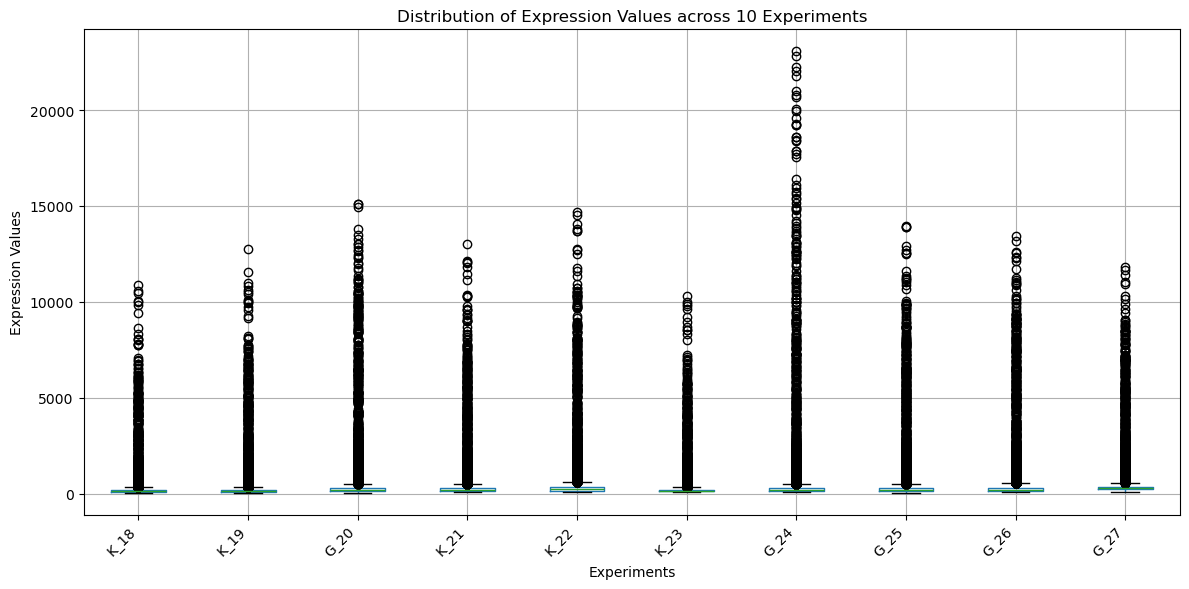

In [13]:
import matplotlib.pyplot as plt

def create_boxplot(data):
    plt.figure(figsize=(12, 6))
    data.boxplot()
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Expression Values')
    plt.xlabel('Experiments')
    plt.title('Distribution of Expression Values across 10 Experiments')
    plt.tight_layout()
    plt.show()

create_boxplot(data)

Problem: Daten sind nicht normalverteilt, da Gene mit höheren Expressionsrate über mehrere Experimente auch größere Varianz aufzeigen.

Vorgeschagener nächster Schritt auf Grundlage der Daten: Daten müssen normalisiert werden. Dies können wir durch eine Logarithmierung erreichen, um eine ungefähr normalverteilte Darstellung der Daten zu bekommen

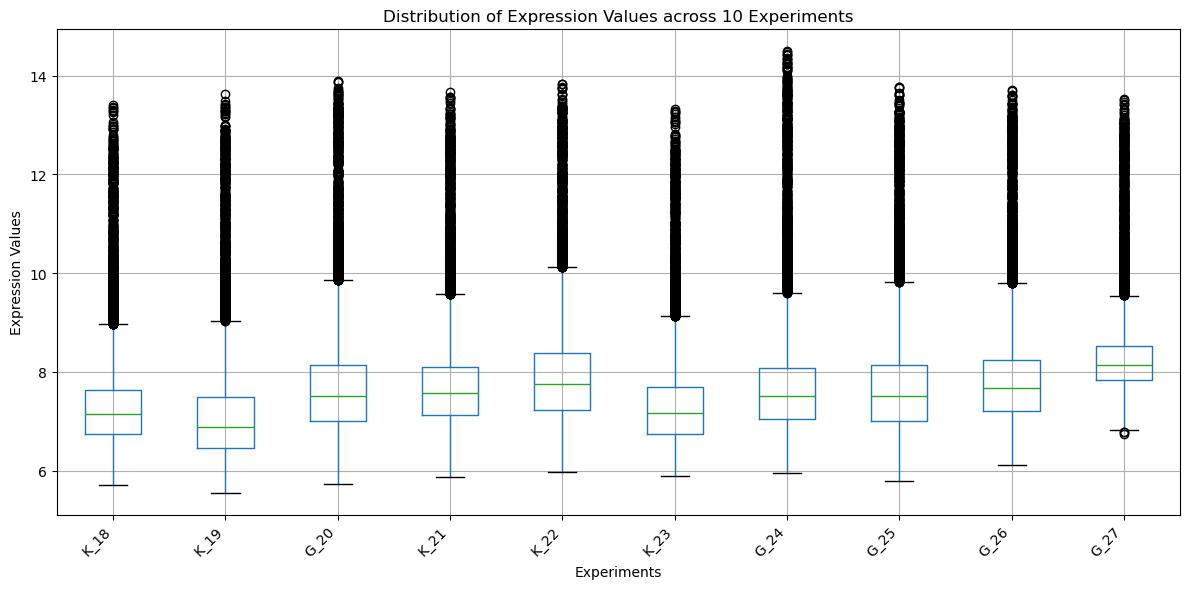

In [14]:
import numpy as np

data_log = data.copy()
data_log.iloc[:, 1:] = np.log2(data.iloc[:, 1:])

create_boxplot(data_log.iloc[:, 1:])

b) Vergleichen Sie die Expressionswerte von Experiment 3 mit Experiment 8 (G20 vs. G25),
sowie Experiment 1 mit Experiment 8 (K18 vs. G25). Erstellen Sie dazu jeweils einen
Scatterplot (z.B. mit smoothScatter ), in dem Sie die logarithmierten Expressionswerte
des jeweiligen Experiments gegeneinander auftragen. Was beobachten Sie?

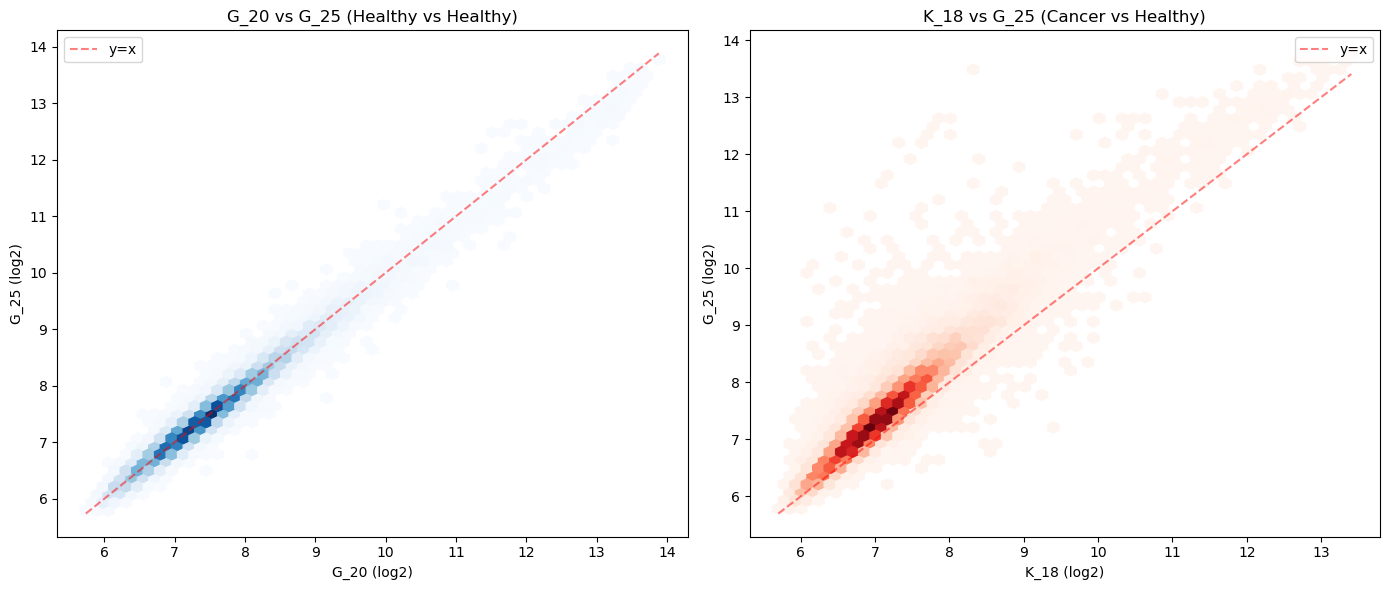

In [19]:
# Create scatter plots comparing expression values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: G_20 vs G_25
axes[0].hexbin(data_log['G_20'], data_log['G_25'], gridsize=50, cmap='Blues', mincnt=1)
axes[0].set_xlabel('G_20 (log2)')
axes[0].set_ylabel('G_25 (log2)')
axes[0].set_title('G_20 vs G_25 (Healthy vs Healthy)')
axes[0].plot([data_log['G_20'].min(), data_log['G_20'].max()], 
             [data_log['G_20'].min(), data_log['G_20'].max()], 
             'r--', alpha=0.5, label='y=x')
axes[0].legend()

# Plot 2: K_18 vs G_25
axes[1].hexbin(data_log['K_18'], data_log['G_25'], gridsize=50, cmap='Reds', mincnt=1)
axes[1].set_xlabel('K_18 (log2)')
axes[1].set_ylabel('G_25 (log2)')
axes[1].set_title('K_18 vs G_25 (Cancer vs Healthy)')
axes[1].plot([data_log['K_18'].min(), data_log['K_18'].max()], 
             [data_log['K_18'].min(), data_log['K_18'].max()], 
             'r--', alpha=0.5, label='y=x')
axes[1].legend()

plt.tight_layout()
plt.show()

Beobachtung: In dem ersten Plot beobachten wir eine starke Korrelation, was auf ein ähnliches Genexpressionsprofil zwischen den beiden Genen in einem gesunden Individuum hindeutet.

In einem Krebspatentien beobachten wir allerdings einen größeren Scatter sowie eine Abweichung von der Diagonalen, haben also ein differentielles Expressionsmuster. K_18 ist also höher exprimiert im Verhältnis zu G_25. Möglicherweise wird G_25 herunterreguliert.

c) Erstellen Sie einen MA-Plot von den Expressionswerten. Die expr_cel.txt enthält
bereits Pseudocounts. Führen Sie dazu folgende Berechnung durch:

$M_i = \log_2(\frac{K_i}{G_i})$,

$A = 0.5 \cdot \log_2(\frac{K_i}{G_i})$

wobei für jedes Gen i der Expressionswert $K_i$ im Krebspatienten $K_{18}$ und $G_i$ der
Expressionswert im gesunden Patienten $G_{25}$ ist. Was beobachten Sie?

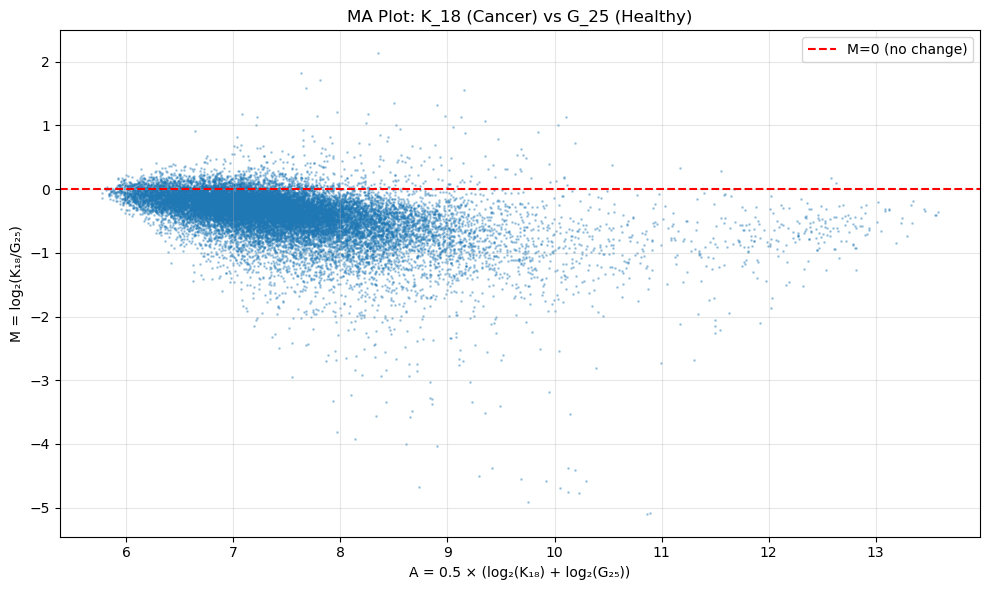

In [ ]:
def calc_m(k, g):
    return np.log2(k/g)

def calc_a(k, g):
    return 0.5 * (np.log2(k) + np.log2(g))

m = calc_m(data["K_18"], data["G_25"])
a = calc_a(data["K_18"], data["G_25"])

plt.figure(figsize=(10, 6))
plt.scatter(a, m, alpha=0.3, s=1)
plt.axhline(y=0, color='r', linestyle='--', label='M=0 (no change)')
plt.xlabel('A = 0.5 × (log₂(K₁₈) + log₂(G₂₅))')
plt.ylabel('M = log₂(K₁₈/G₂₅)')
plt.title('MA Plot: K_18 (Cancer) vs G_25 (Healthy)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Beobachtungen:
1. Wir beobachten die aus der Vorlesung bekannte "Bananenform" einer nicht-normalisierten MA-Plot, was auf eine intensitätsabhängige Verzerrung (intensity-dependent bias) hindeutet.
2. Die meisten Gene zeigen moderate Expressionsunterschiede (M-Werte nahe 0), aber es gibt deutliche Ausreißer mit hohen positiven und negativen M-Werten.
3. Bei niedrigeren A-Werten (schwach exprimierte Gene) ist die Streuung größer, was auf höhere technische Variabilität bei niedrigen Expressionsniveaus hindeutet.
4. Es gibt eine systematische Verschiebung von der M=0-Linie, besonders bei mittleren A-Werten, was darauf hindeutet, dass eine Normalisierung (z.B. LOESS) notwendig wäre, um diese technischen Effekte zu korrigieren.